# Characterising Networks

In this notebook we will look at the fundamental ways that we might use to characterise and study a new network dataset. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load a small sample undirected network, representing connections on the LinkedIn platform. The network is stored in the XML-based GEXF format, which NetworkX can read.

In [2]:
g = nx.read_gexf("linkedin25.gexf")

We can produce a simple network diagram for this network:

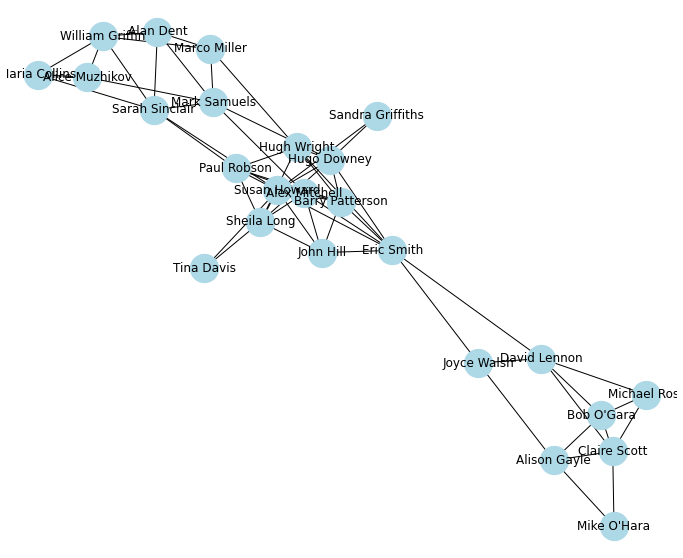

In [3]:
# specify the size of the figure
plt.figure(figsize=(12,10))
# draw the diagram
nx.draw_networkx( g, with_labels=True, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()

The most basic characterisation we might perform would be simply to count the number of nodes and edges:

In [4]:
g.number_of_nodes()

25

In [5]:
g.number_of_edges()

61

### Density and Paths

We often look at the level of connectivity within a network - i.e its **density**. A dense network is one where the number of edges is close to the maximum possible number of edges. 

In [6]:
nx.density(g)

0.20333333333333334

We can also check if the network is **connected** - i.e. is there a path between every pair of nodes?

In [7]:
nx.is_connected(g)

True

A **path** is a sequence of nodes and edges which connect one node to another.  A graph is connected if every pair of nodes is joined at least by one path.

In [8]:
nx.has_path(g, "Eric Smith", "Tina Davis")

True

The length of a path is the number of edges it crosses. The **shortest path** between two nodes in a network is the path with the minimum number of edges.

In [9]:
nx.shortest_path(g, "Eric Smith", "Tina Davis")

['Eric Smith', 'Susan Howard', 'Tina Davis']

In [10]:
nx.shortest_path(g, "Eric Smith", "Maria Collins")

['Eric Smith', 'Susan Howard', 'Sarah Sinclair', 'Maria Collins']

The **distance** between two nodes in a network is the length of the shortest path between them (i.e. number of edges crossed).

In [11]:
nx.shortest_path_length(g, "Eric Smith", "Tina Davis")

2

In [12]:
nx.shortest_path_length(g, "Eric Smith", "Maria Collins")

3

The **diameter** of a network is the length of the longest shortest path between any pair of nodes in the network.

In [13]:
nx.diameter(g)

6

### Components and Subgraphs

Currently, the network consists of one single, large **component** - i.e. the network is **connected**.

In [14]:
nx.number_connected_components(g)

1

In [15]:
nx.is_connected(g)

True

However, if we were to remove certain nodes from the networks, the network would start to split up:

In [16]:
g.remove_node("Eric Smith")

The network now consists of two distinct **connected components**. We can iterate over those components using the function *connected_components()*:

In [17]:
nx.number_connected_components(g)

2

In [18]:
# display the nodes in each component
for component in nx.connected_components(g):
    print(component)

{'Marco Miller', 'Sheila Long', 'John Hill', 'William Griffin', 'Paul Robson', 'Alice Muzhikov', 'Hugh Wright', 'Susan Howard', 'Barry Patterson', 'Alex Mitchell', 'Sarah Sinclair', 'Sandra Griffiths', 'Maria Collins', 'Mark Samuels', 'Hugo Downey', 'Alan Dent', 'Tina Davis'}
{'Michael Ross', 'David Lennon', 'Joyce Walsh', 'Claire Scott', "Bob O'Gara", 'Alison Gayle', "Mike O'Hara"}


We can see the split visually too:

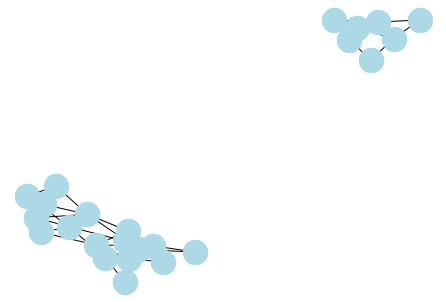

In [19]:
nx.draw( g, node_size=600, node_color="lightblue" )

Rather than looking at components, we might be interested in looking at sub-parts of the network around certain nodes of interest.

In NetworkX, we can access a **subgraph** by specifying the list of node identifiers:

In [20]:
required = ["Alison Gayle", "Bob O'Gara", "Michael Ross", "Claire Scott"]
sg = nx.subgraph( g, required )

We can call all the usual NetworkX functions on this new network:

In [21]:
sg.number_of_nodes(), sg.number_of_edges()

(4, 5)

For instance, we could check if this subgraph is more dense than the original network.

In [22]:
nx.density(g), nx.density(sg)

(0.19202898550724637, 0.8333333333333334)

We can also draw a diagram of the subgraph:

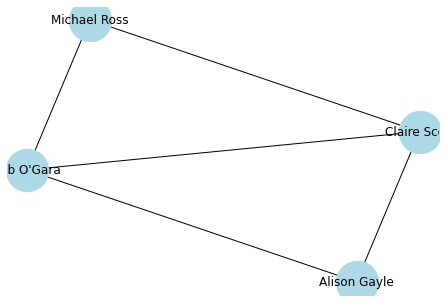

In [23]:
nx.draw( sg, with_labels=True, node_size=1800, node_color="lightblue" )